# Computer vision - pénzérmék feladat magyarázata

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

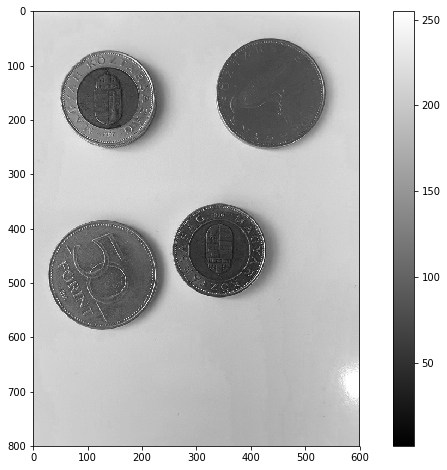

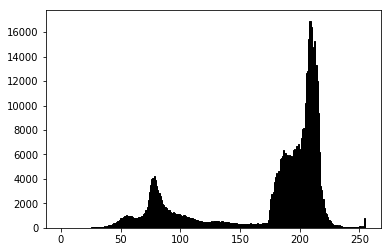

In [2]:
penz_kep = cv2.imread(os.path.join("data", "penz01.jpg"))
penz_kep = penz_kep[:,:,0].astype(np.uint8)
plt.figure(1, figsize=(12,8))
plt.imshow(penz_kep, cmap = "gray")
plt.colorbar()
plt.show()
plt.hist(penz_kep.ravel(), bins=256, range=(0.0, 255.0), fc='k', ec='k')
plt.show()

Min: 2 Max: 255


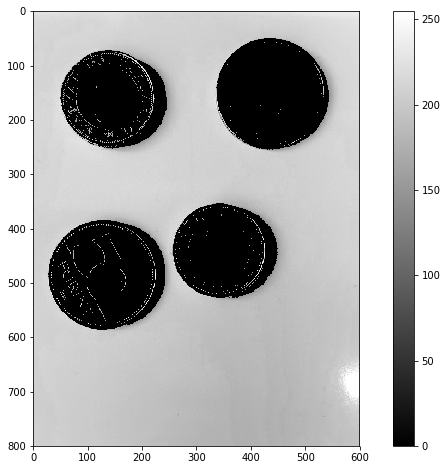

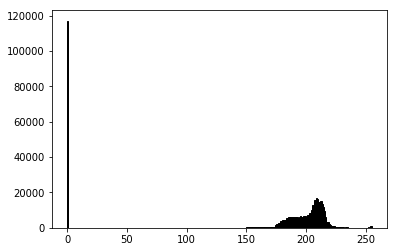

In [3]:
print("Min:", penz_kep.min(), "Max:", penz_kep.max()) # 0-255 közötti értékek
penz_kep[penz_kep < 150] = 0
plt.figure(1, figsize=(12,8))
plt.imshow(penz_kep, cmap = "gray")
plt.colorbar()
plt.show()
plt.hist(penz_kep.ravel(), bins=256, range=(0.0, 255.0), fc='k', ec='k')
plt.show()

Min: 0 Max: 1


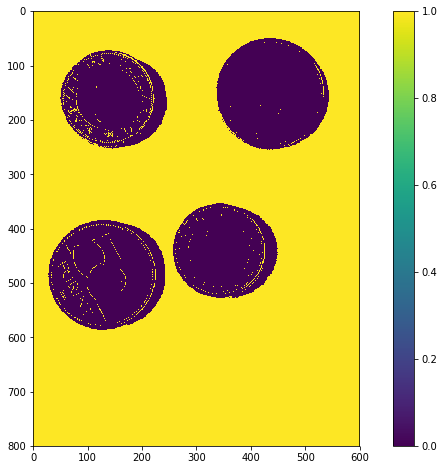

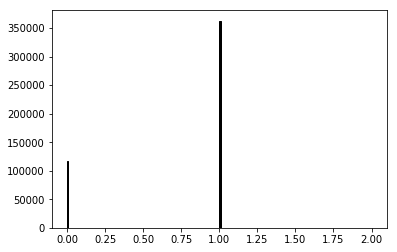

In [4]:
penz_kep[penz_kep >= 150] = 1
print("Min:", penz_kep.min(), "Max:", penz_kep.max())
plt.figure(1, figsize=(12,8))
plt.imshow(penz_kep)
plt.colorbar()
plt.show()
plt.hist(penz_kep.ravel(), bins=256, range=(0.0, 2), fc='k', ec='k')
plt.show()

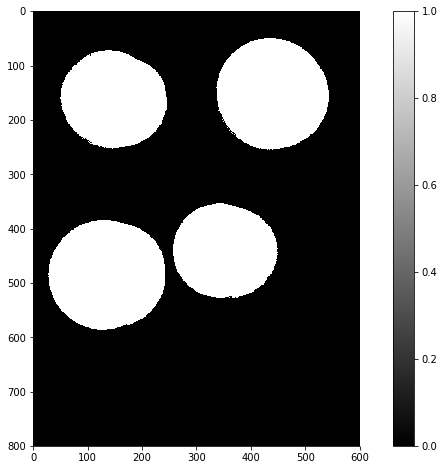

In [5]:
penz_kitoltes = penz_kep
h, w = penz_kep.shape[:2]
#print(type(penz_kitoltes), penz_kitoltes.shape)
cv2.floodFill(penz_kitoltes, None, (0, 0), 255)
penz_kitoltes[penz_kitoltes < 150] = 1
penz_kitoltes[penz_kitoltes >= 150] = 0
plt.figure(1, figsize=(12,8))
plt.imshow(penz_kitoltes, cmap = "gray")
plt.colorbar()
plt.show()

In [6]:
# keressük meg az összekötött komponenseket, írjuk ki azok méretét
nb_components1, output1, stats1, centroids1 = cv2.connectedComponentsWithStats(penz_kitoltes, connectivity=8)
sizes1 = stats1[1:, -1]
print(sizes1)

[32978 27252     3     2     1     1     3     1     2     4     5    13
     1     2     1     3 26277 34253     1     1     2     1     1     1
     1]


[32978 27252 26277 34253]


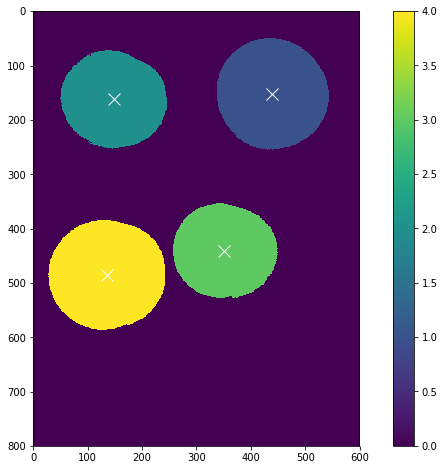

4 darab érme.
[[     0      0    600    800 359240]
 [   337     50    207    205  32978]
 [    50     72    195    181  27252]
 [   256    354    193    174  26277]
 [    28    385    216    201  34253]]


In [7]:
#szűrjük kki az 500 pixel alatti "hibákat"
min_size = 500  
penz_szurve = np.zeros((output1.shape))
# csak a min_size-nál nagyobb méretűt tarsuk meg
for i in range(0, nb_components1 - 1):
    if sizes1[i] >= min_size:
        penz_szurve[output1 == i + 1] = True

nb_components2, output2, stats2, centroids2 = cv2.connectedComponentsWithStats(penz_szurve.astype(np.uint8), connectivity=8)
sizes2 = stats2[1:, -1]
print(sizes2)

sizes = stats1[1:, -1]
plt.figure(1, figsize=(12,8))
plt.imshow(output2)
plt.colorbar()
plt.plot(centroids2[1:, 0], centroids2[1:, 1], "xw", markersize=12)
plt.show()
print(nb_components2 - 1, "darab érme.")
print(stats2)